Headers aplicables a todas las funciones

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import random
from src.genetic.genetic_algorithm import genetic_algorithm, generate_start_population
from src.utils import get_palette
from csv import reader

def plot_evolution(best_of_each_generation_array, name):
    # Gráfico de evolución de cada sujeto
    n = len(best_of_each_generation_array)  # number of arrays
    M = max(len(a) for a in best_of_each_generation_array)

    for i in range(n):
        best_of_each_generation_array[i] += [None] * (M - len(best_of_each_generation_array[i]))

    for i in range(n):
        plt.plot(range(M), best_of_each_generation_array[i], label="")
        
    plt.title(f'Mejor de cada generación para {name}')
    plt.xlabel("Generación")
    plt.ylabel("Aptitud")
    plt.show()
    
selection_options = ["ELITE", "ROULETTE", "UNIVERSAL", "TOURNAMENT_DETERMINISTIC", "TOURNAMENT_PROBABILISTIC"]
crossing_options = ["ONE_POINT", "DOUBLE_POINT", "ANGULAR", "UNIFORM"]
mutation_options = ["ONE_GEN", "MULTIGEN_LIMITED", "MULTIGEN_UNIFORM", "COMPLETE"]
select_new_generation_options = ["USE_ALL", "NEW_OVER_ACTUAL"]
color_count = 50
color_graph = 10
N = 100
K = 100
palette = get_palette("./src/colores.csv")
print(palette)
d_error = 0.01 
time = -1
max_generations = 1000

target_colors = []
start_population = []
for i in range(color_count):
    color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    start_population.append(generate_start_population(N, palette, color))
    target_colors.append(color)
    

    
print(target_colors)

[[  0   0   0]
 [255   0   0]
 [  0 255   0]
 [  0   0 255]
 [255 255   0]
 [  0 255 255]
 [255   0 255]
 [255 255 255]]
[(26, 27, 180), (18, 197, 214), (77, 231, 189), (179, 233, 153), (251, 232, 249), (68, 190, 88), (56, 185, 178), (93, 26, 4), (49, 98, 221), (4, 247, 212), (113, 219, 223), (51, 231, 100), (90, 224, 152), (108, 255, 66), (156, 176, 0), (206, 142, 205), (151, 223, 92), (35, 18, 199), (168, 171, 87), (162, 140, 53), (14, 72, 60), (158, 181, 210), (153, 53, 159), (225, 95, 42), (167, 254, 42), (1, 117, 227), (231, 212, 217), (14, 106, 182), (98, 46, 54), (44, 126, 181), (12, 154, 47), (134, 149, 90), (98, 48, 52), (190, 75, 51), (3, 58, 66), (206, 129, 89), (94, 222, 42), (145, 51, 90), (134, 118, 7), (19, 25, 3), (6, 237, 91), (86, 153, 122), (227, 25, 123), (147, 43, 27), (102, 19, 148), (205, 206, 4), (241, 174, 233), (116, 223, 231), (144, 80, 46), (0, 224, 76)]


Run variando select

ELITE


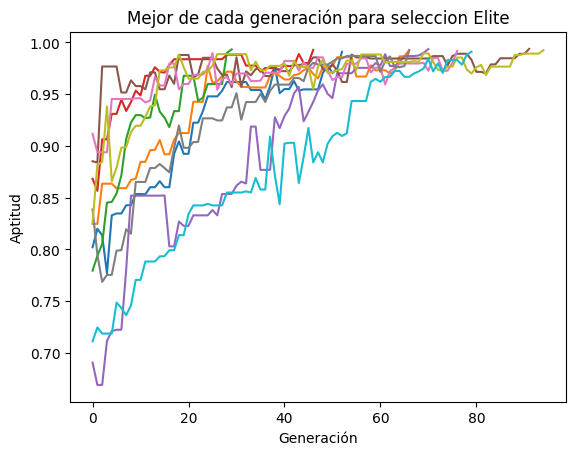

ROULETTE


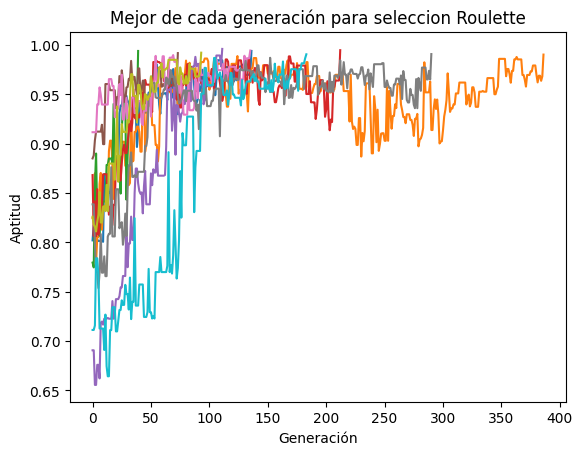

UNIVERSAL


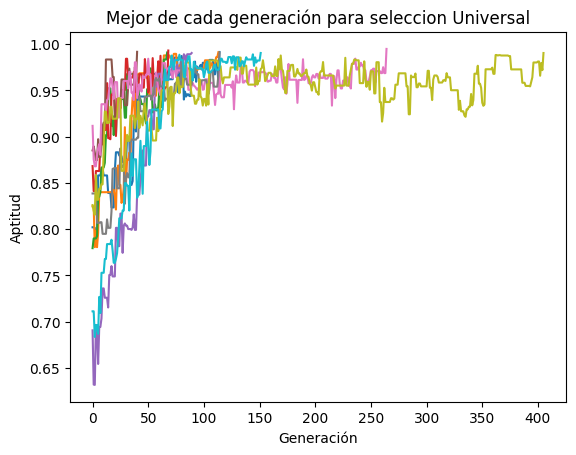

TOURNAMENT_DETERMINISTIC


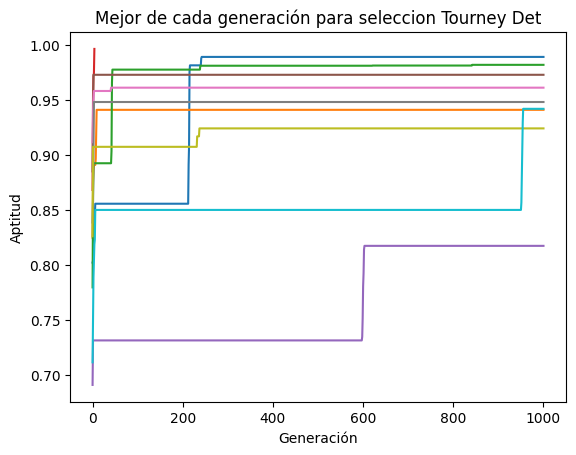

TOURNAMENT_PROBABILISTIC


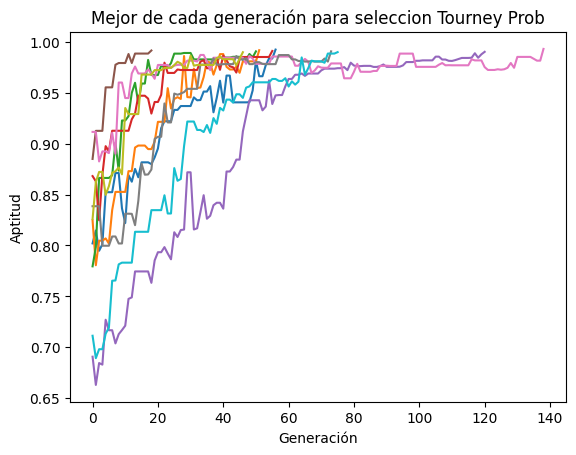

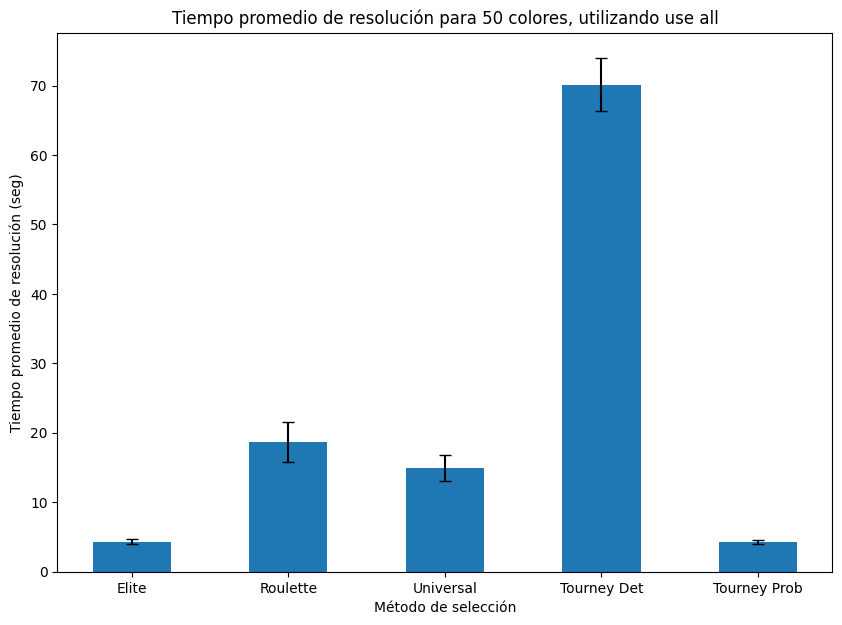

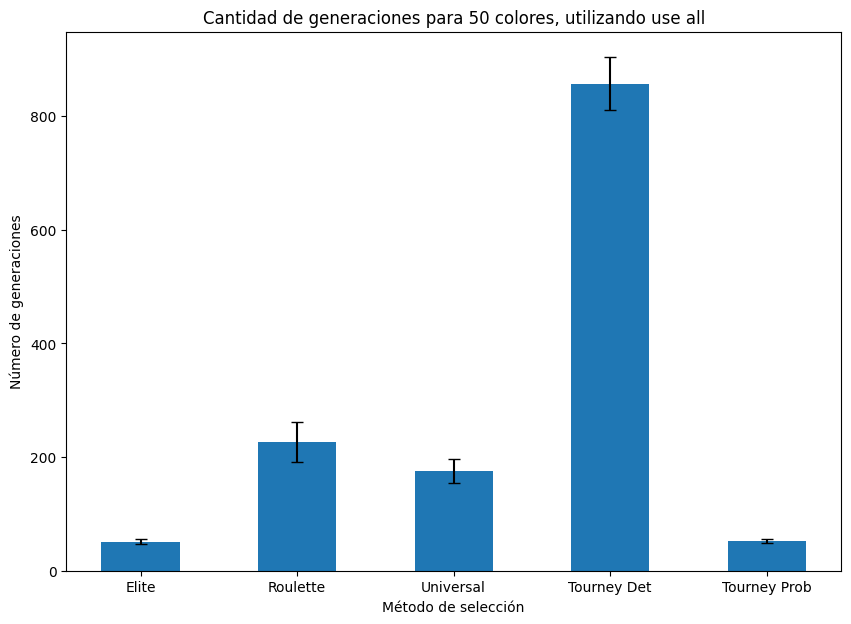

ELITE


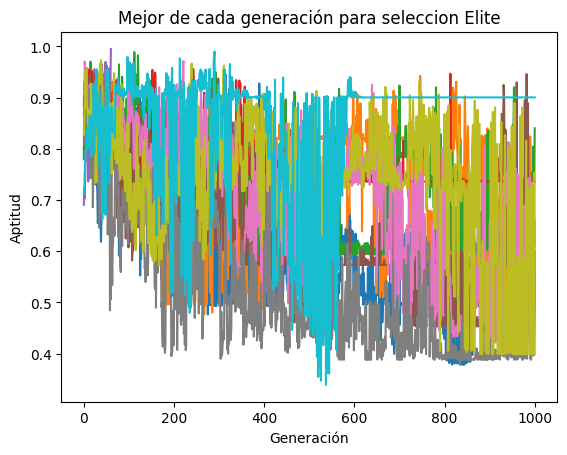

ROULETTE


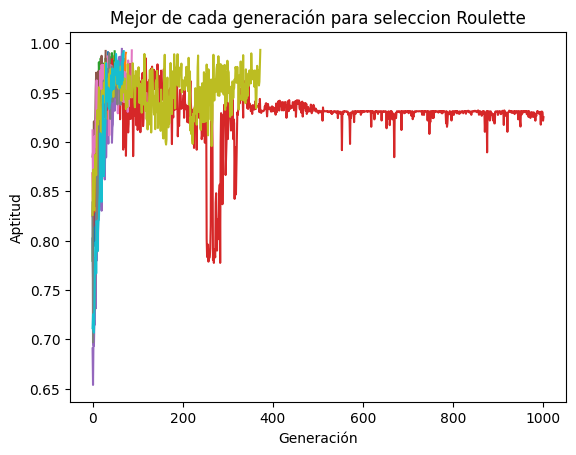

UNIVERSAL


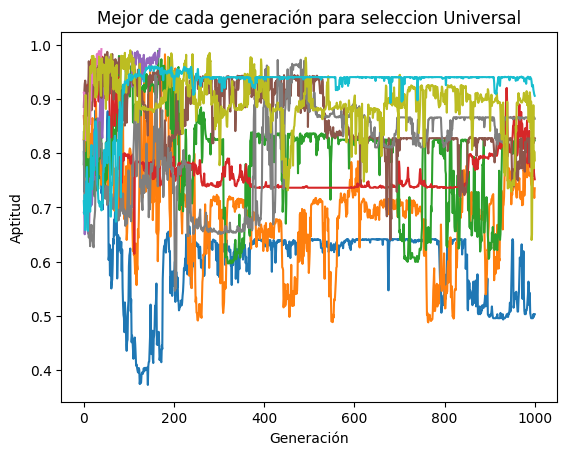

TOURNAMENT_DETERMINISTIC


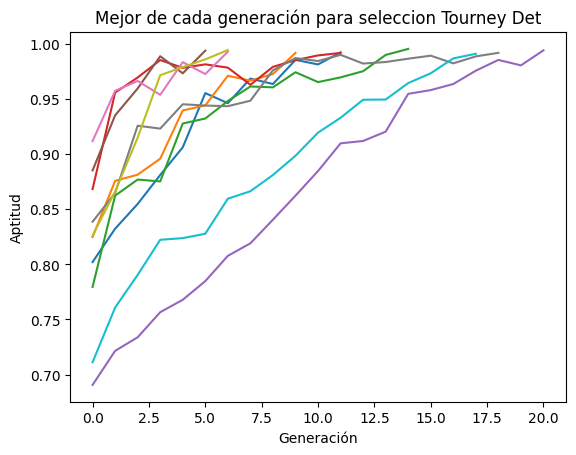

TOURNAMENT_PROBABILISTIC


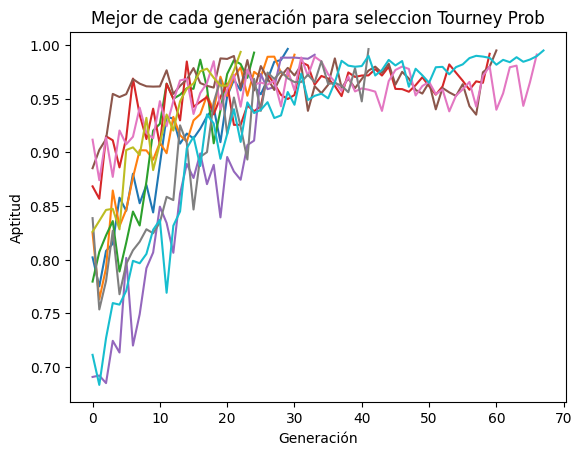

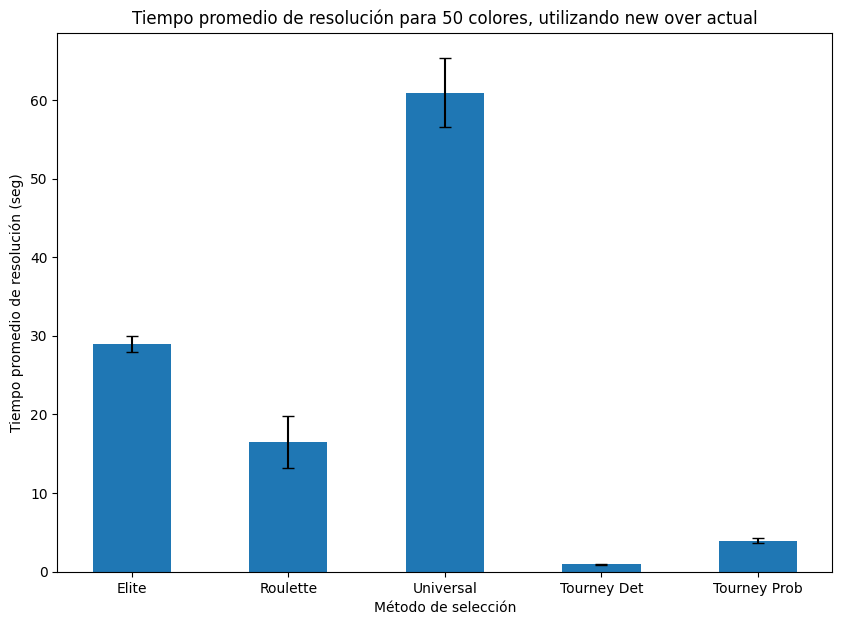

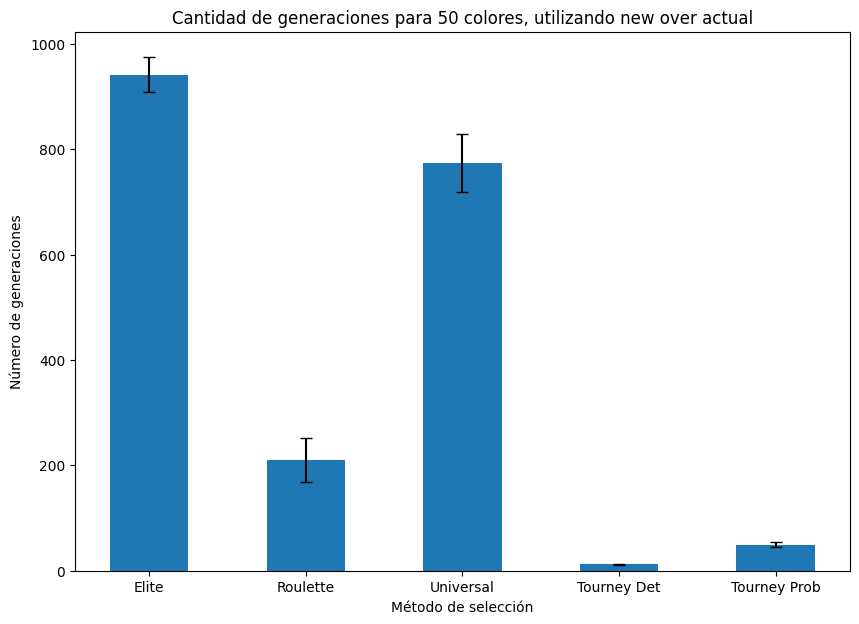

In [14]:
current_crossing = "UNIFORM"
current_mutation = "COMPLETE"
current_p_mutation = 0.5
current_combination = "USE_ALL"

average_time = [] 
average_generations = [] 
  
std_errors_time = []
std_errors_generations = []
name = 0

selection_options_name = ["Elite", "Roulette", "Universal", "Tourney Det", "Tourney Prob"]
for option in selection_options:
    print(option)
    times = []
    generations = []
    best_of_each_generation_array = []
    for i in range(color_count):
        time_passed, finish_condition, best_subject, best_of_each_generation, generation = genetic_algorithm(palette, N, target_colors[i], option,
                        current_crossing, current_mutation, current_p_mutation,
                        current_combination, K, max_generations, d_error, time, start_population[i])

        times.append(time_passed)
        generations.append(generation)
        if (i < color_graph):
            best_of_each_generation_array.append(best_of_each_generation)

        
    plot_evolution(best_of_each_generation_array, f'seleccion {selection_options_name[name]}' )
    name+=1
    
    avg_time = sum(times) / len(times)        
    average_time.append(avg_time)
    error_time = np.std(times) / np.sqrt(len(times))
    std_errors_time.append(error_time)

    avg_step = sum(generations) / len(generations)        
    average_generations.append(avg_step)
    error_step = np.std(generations) / np.sqrt(len(generations))
    std_errors_generations.append(error_step)
    

#----------------------------------------
#Grafico del tiempo que tarda
fig = plt.figure(figsize =(10, 7))
plt.bar(selection_options_name, average_time, yerr=std_errors_time, capsize=4, width=0.5, align="center")
plt.title(f'Tiempo promedio de resolución para {color_count} colores, utilizando use all')
plt.xlabel('Método de selección')
plt.ylabel('Tiempo promedio de resolución (seg)')

plt.show()

#----------------------------------------
#Grafico de cantidad de pasos
fig = plt.figure(figsize =(10, 7))
plt.bar(selection_options_name, average_generations, yerr=std_errors_generations, capsize=4, width=0.5, align="center")
plt.title(f'Cantidad de generaciones para {color_count} colores, utilizando use all')
plt.xlabel('Método de selección')
plt.ylabel('Número de generaciones')
plt.show()

current_crossing = "UNIFORM"
current_mutation = "COMPLETE"
current_p_mutation = 0.5
current_combination = "NEW_OVER_ACTUAL"

average_time = [] 
average_generations = [] 
  
std_errors_time = []
std_errors_generations = []
name = 0

selection_options_name = ["Elite", "Roulette", "Universal", "Tourney Det", "Tourney Prob"]
for option in selection_options:
    print(option)
    times = []
    generations = []
    best_of_each_generation_array = []
    for i in range(color_count):
        time_passed, finish_condition, best_subject, best_of_each_generation, generation = genetic_algorithm(palette, N, target_colors[i], option,
                        current_crossing, current_mutation, current_p_mutation,
                        current_combination, K, max_generations, d_error, time, start_population[i])

        times.append(time_passed)
        generations.append(generation)
        
        if (i < color_graph):
            best_of_each_generation_array.append(best_of_each_generation)

        
    plot_evolution(best_of_each_generation_array, f'seleccion {selection_options_name[name]}' )
    name+=1
    
    avg_time = sum(times) / len(times)        
    average_time.append(avg_time)
    error_time = np.std(times) / np.sqrt(len(times))
    std_errors_time.append(error_time)

    avg_step = sum(generations) / len(generations)        
    average_generations.append(avg_step)
    error_step = np.std(generations) / np.sqrt(len(generations))
    std_errors_generations.append(error_step)

#----------------------------------------
#Grafico del tiempo que tarda
fig = plt.figure(figsize =(10, 7))
plt.bar(selection_options_name, average_time, yerr=std_errors_time, capsize=4, width=0.5, align="center")
plt.title(f'Tiempo promedio de resolución para {color_count} colores, utilizando new over actual')
plt.xlabel('Método de selección')
plt.ylabel('Tiempo promedio de resolución (seg)')

plt.show()

#----------------------------------------
#Grafico de cantidad de pasos
fig = plt.figure(figsize =(10, 7))
plt.bar(selection_options_name, average_generations, yerr=std_errors_generations, capsize=4, width=0.5, align="center")
plt.title(f'Cantidad de generaciones para {color_count} colores, utilizando new over actual')
plt.xlabel('Método de selección')
plt.ylabel('Número de generaciones')
plt.show()

Run variando cruza

ONE_POINT


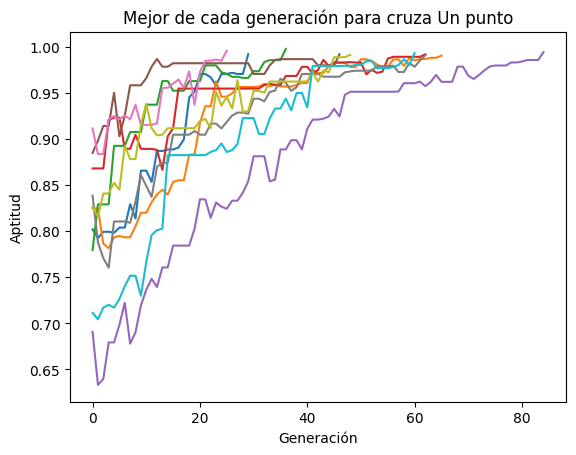

DOUBLE_POINT


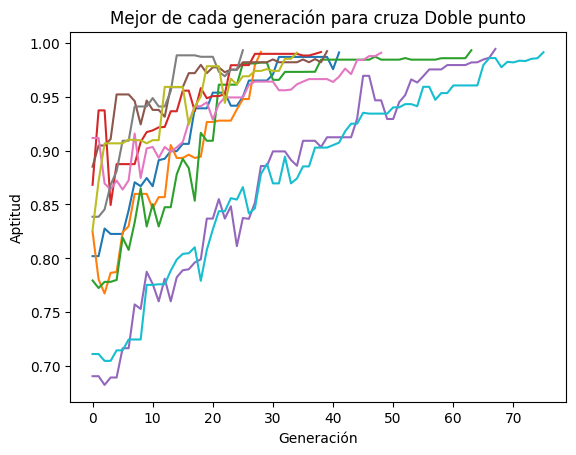

ANGULAR


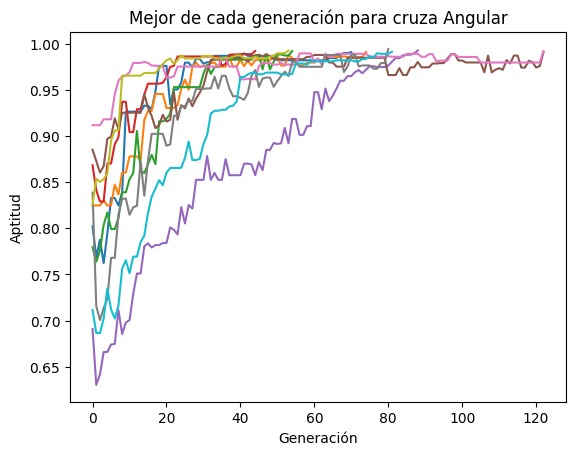

UNIFORM


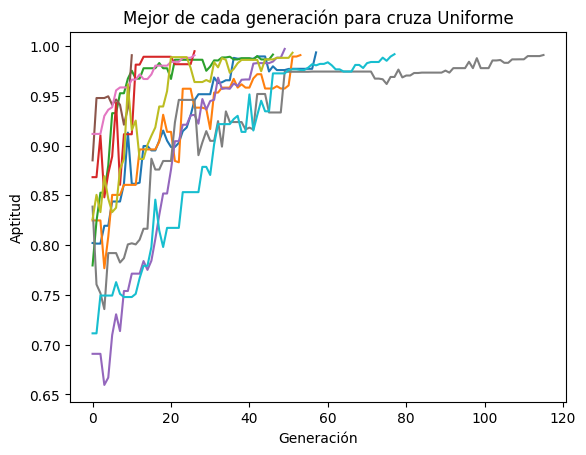

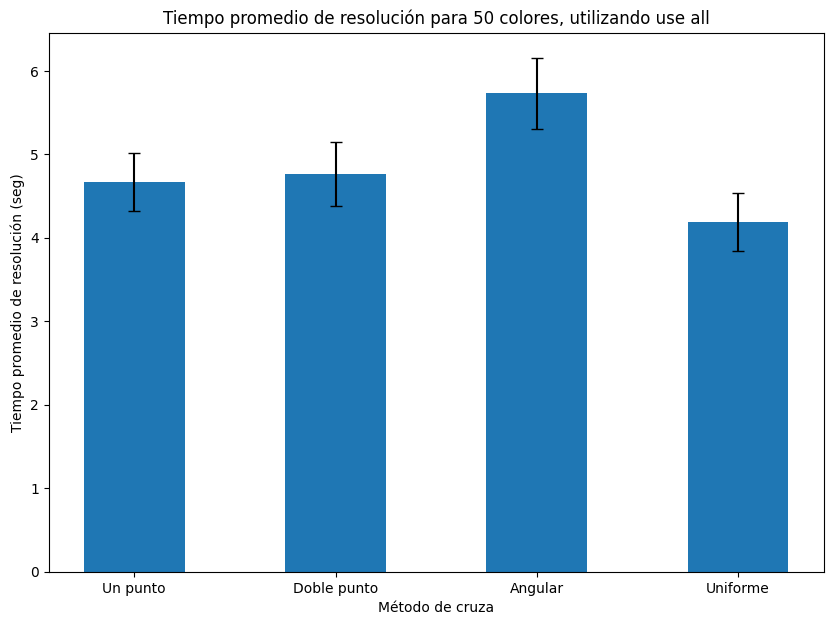

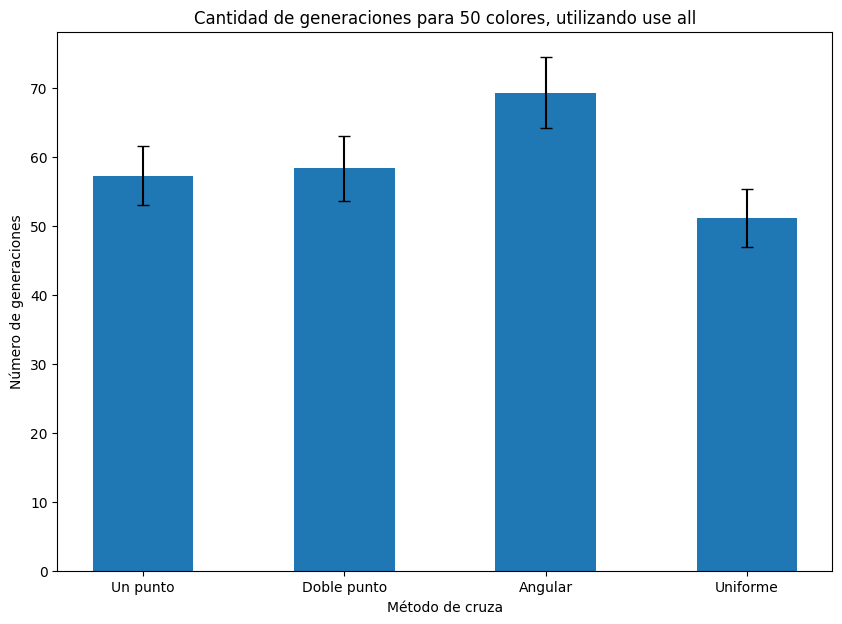

ONE_POINT


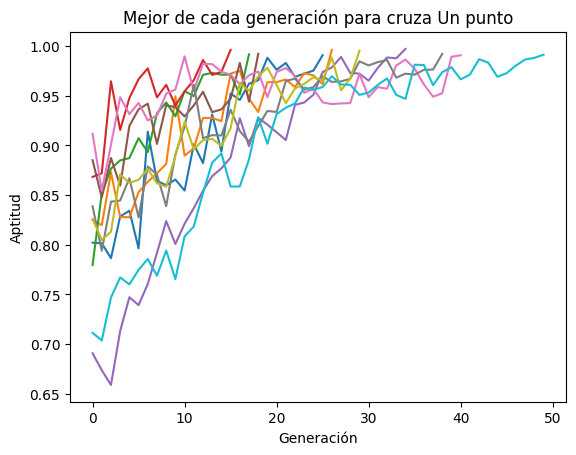

DOUBLE_POINT


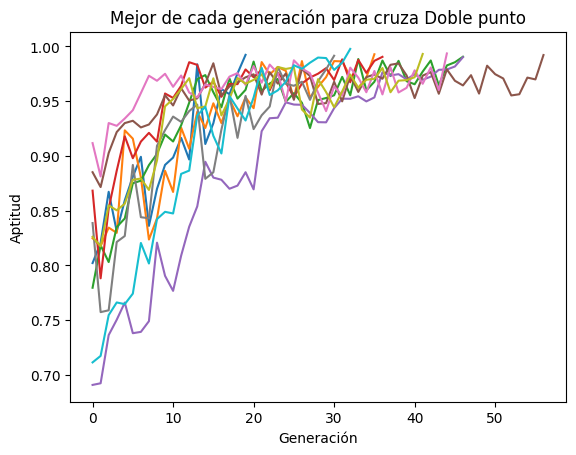

ANGULAR


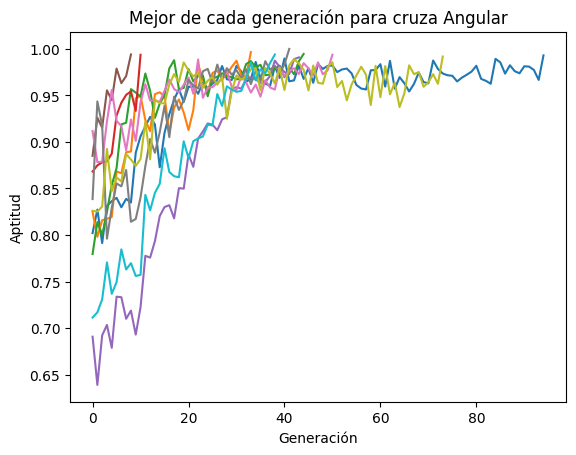

UNIFORM


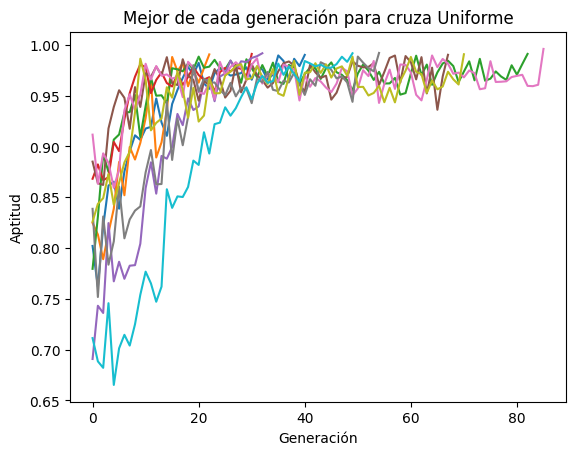

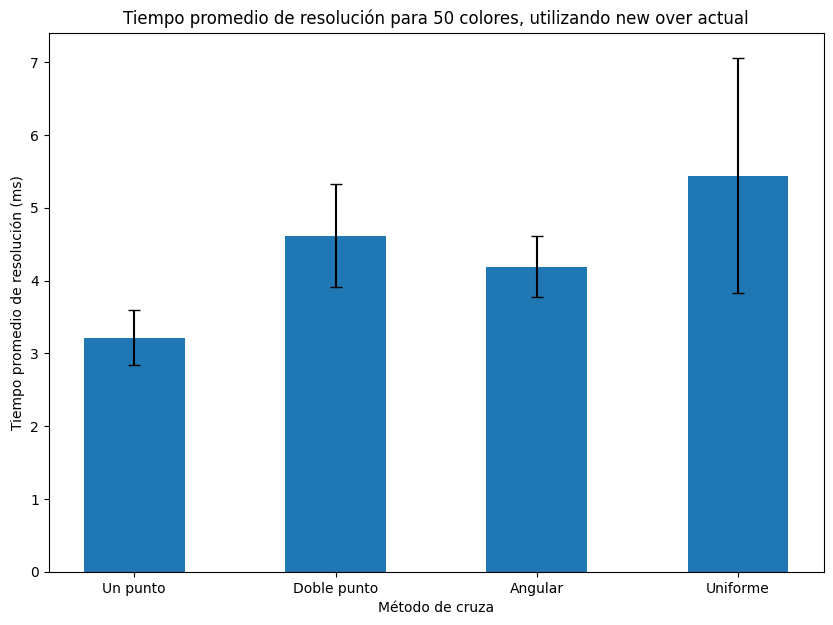

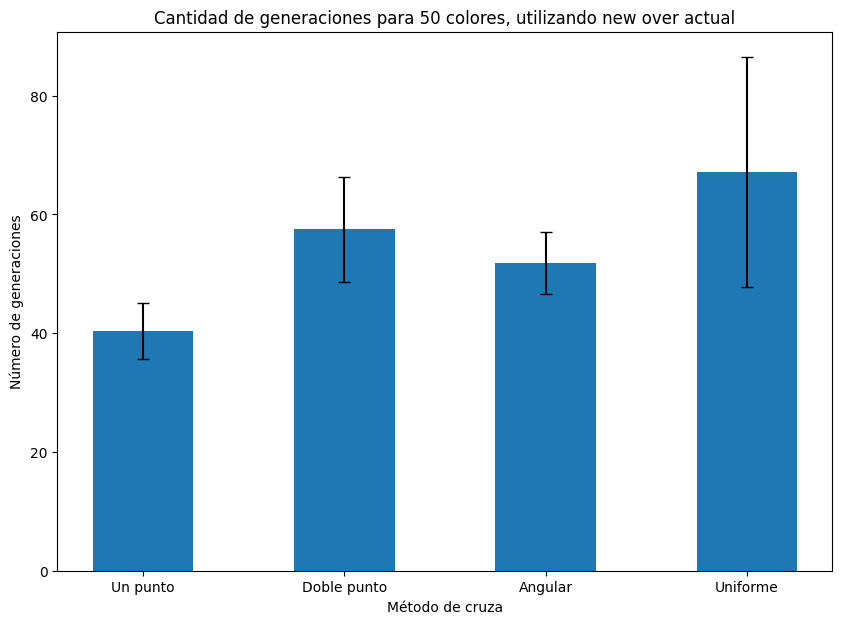

In [15]:
current_selection = "TOURNAMENT_PROBABILISTIC"
current_mutation = "COMPLETE"
current_p_mutation = 0.5
current_combination = "USE_ALL"

average_time = [] 
average_generations = [] 
  
std_errors_time = []
std_errors_generations = []
name = 0

crossing_options_name = ["Un punto", "Doble punto", "Angular", "Uniforme"]
for option in crossing_options:
    print(option)
    times = []
    generations = []
    best_of_each_generation_array = []
    for i in range(color_count):
        time_passed, finish_condition, best_subject, best_of_each_generation, generation = genetic_algorithm(palette, N, target_colors[i], current_selection,
                        option, current_mutation, current_p_mutation,
                        current_combination, K, max_generations, d_error, time, start_population[i])

        times.append(time_passed)
        generations.append(generation)
        if (i < color_graph):
            best_of_each_generation_array.append(best_of_each_generation)

        
    plot_evolution(best_of_each_generation_array, f'cruza {crossing_options_name[name]}' )
    name+=1
    
    avg_time = sum(times) / len(times)        
    average_time.append(avg_time)
    error_time = np.std(times) / np.sqrt(len(times))
    std_errors_time.append(error_time)

    avg_step = sum(generations) / len(generations)        
    average_generations.append(avg_step)
    error_step = np.std(generations) / np.sqrt(len(generations))
    std_errors_generations.append(error_step)

#----------------------------------------
#Grafico del tiempo que tarda
fig = plt.figure(figsize =(10, 7))
plt.bar(crossing_options_name, average_time, yerr=std_errors_time, capsize=4, width=0.5, align="center")
plt.title(f'Tiempo promedio de resolución para {color_count} colores, utilizando use all')
plt.xlabel('Método de cruza')
plt.ylabel('Tiempo promedio de resolución (seg)')

plt.show()

#----------------------------------------
#Grafico de cantidad de pasos
fig = plt.figure(figsize =(10, 7))
plt.bar(crossing_options_name, average_generations, yerr=std_errors_generations, capsize=4, width=0.5, align="center")
plt.title(f'Cantidad de generaciones para {color_count} colores, utilizando use all')
plt.xlabel('Método de cruza')
plt.ylabel('Número de generaciones')
plt.show()

current_selection = "TOURNAMENT_PROBABILISTIC"
current_mutation = "COMPLETE"
current_p_mutation = 0.5
current_combination = "NEW_OVER_ACTUAL"

average_time = [] 
average_generations = [] 
  
std_errors_time = []
std_errors_generations = []
name = 0

crossing_options_name = ["Un punto", "Doble punto", "Angular", "Uniforme"]
for option in crossing_options:
    print(option)
    times = []
    generations = []
    best_of_each_generation_array = []
    for i in range(color_count):
        time_passed, finish_condition, best_subject, best_of_each_generation, generation = genetic_algorithm(palette, N, target_colors[i], current_selection,
                        option, current_mutation, current_p_mutation,
                        current_combination, K, max_generations, d_error, time, start_population[i])

        times.append(time_passed)
        generations.append(generation)
        if (i < color_graph):
            best_of_each_generation_array.append(best_of_each_generation)
        
    plot_evolution(best_of_each_generation_array, f'cruza {crossing_options_name[name]}' )
    name+=1
    
    avg_time = sum(times) / len(times)        
    average_time.append(avg_time)
    error_time = np.std(times) / np.sqrt(len(times))
    std_errors_time.append(error_time)

    avg_step = sum(generations) / len(generations)        
    average_generations.append(avg_step)
    error_step = np.std(generations) / np.sqrt(len(generations))
    std_errors_generations.append(error_step)

#----------------------------------------
#Grafico del tiempo que tarda
fig = plt.figure(figsize =(10, 7))
plt.bar(crossing_options_name, average_time, yerr=std_errors_time, capsize=4, width=0.5, align="center")
plt.title(f'Tiempo promedio de resolución para {color_count} colores, utilizando new over actual')
plt.xlabel('Método de cruza')
plt.ylabel('Tiempo promedio de resolución (ms)')

plt.show()

#----------------------------------------
#Grafico de cantidad de pasos
fig = plt.figure(figsize =(10, 7))
plt.bar(crossing_options_name, average_generations, yerr=std_errors_generations, capsize=4, width=0.5, align="center")
plt.title(f'Cantidad de generaciones para {color_count} colores, utilizando new over actual')
plt.xlabel('Método de cruza')
plt.ylabel('Número de generaciones')
plt.show()

Run variando metodo de mutacion

ONE_GEN


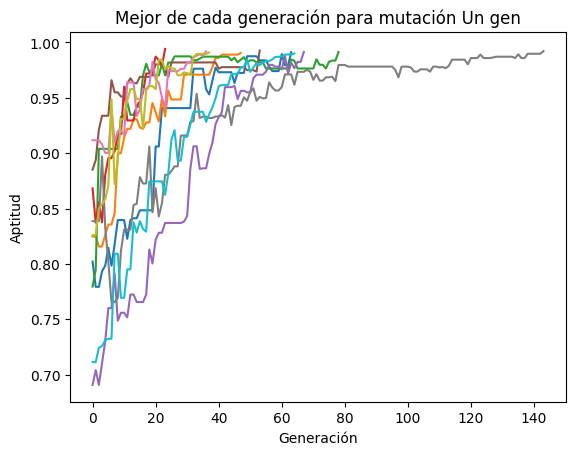

MULTIGEN_LIMITED


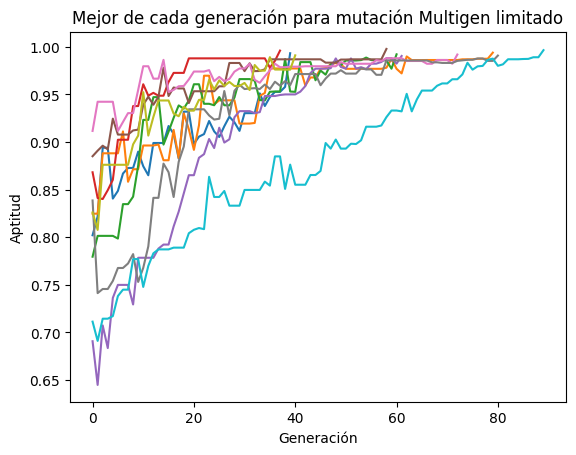

MULTIGEN_UNIFORM


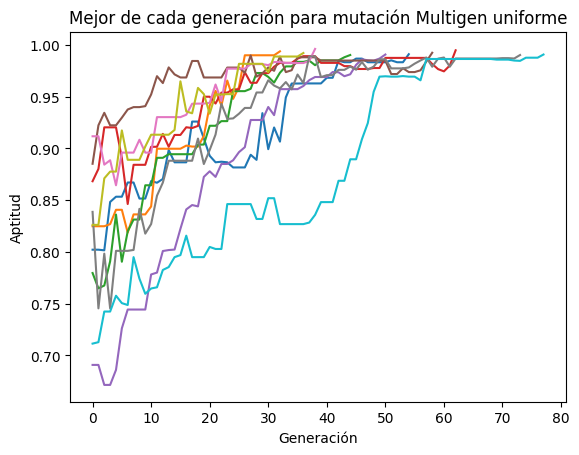

COMPLETE


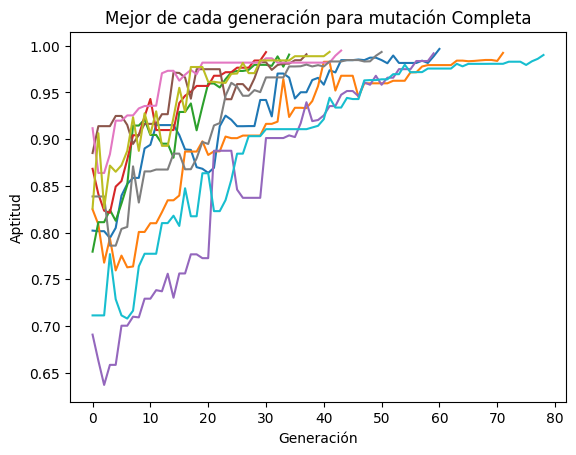

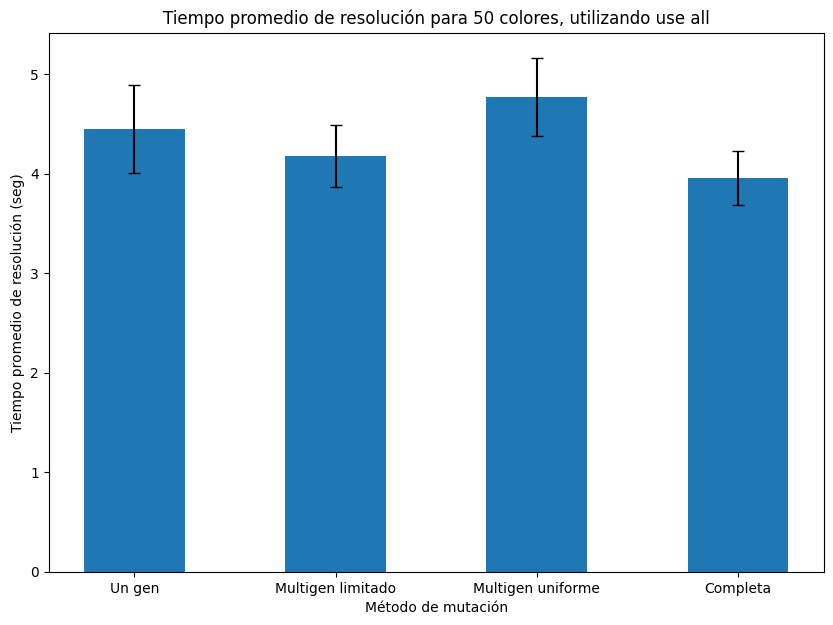

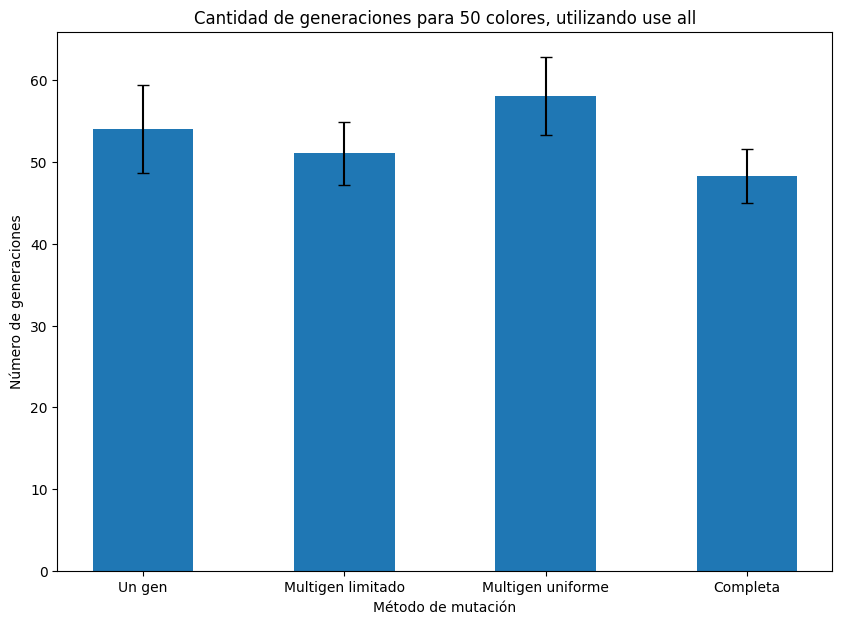

ONE_GEN


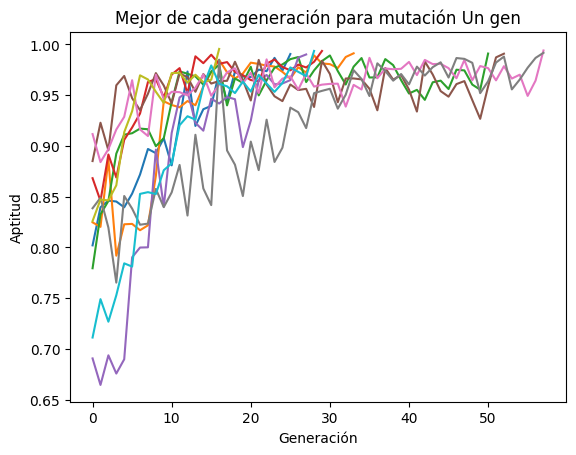

MULTIGEN_LIMITED


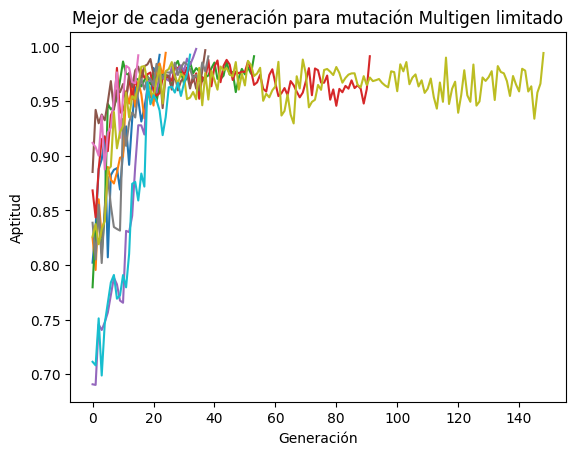

MULTIGEN_UNIFORM


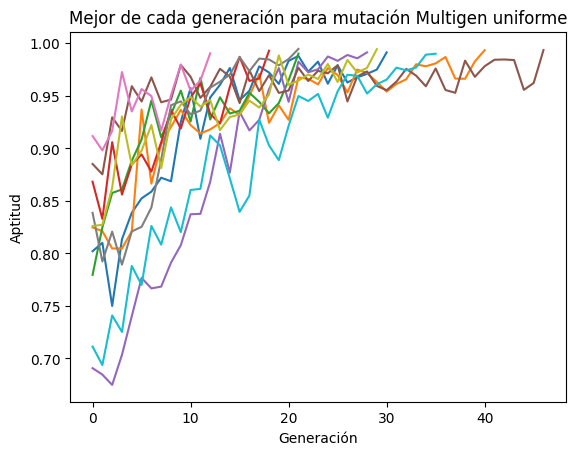

COMPLETE


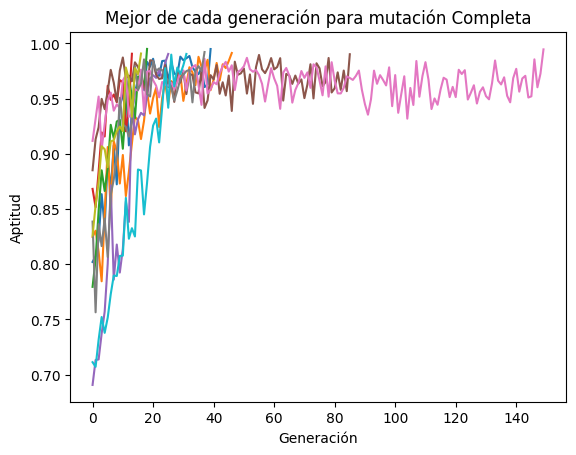

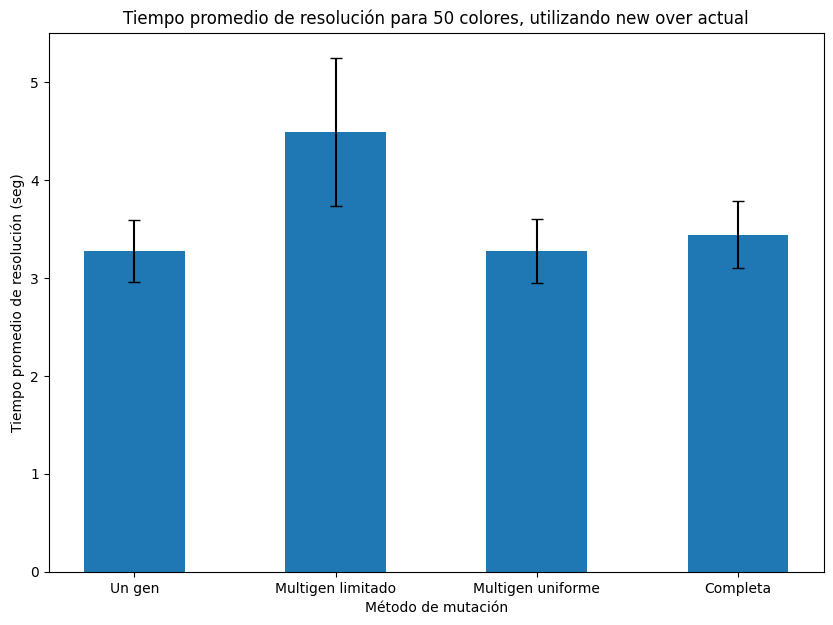

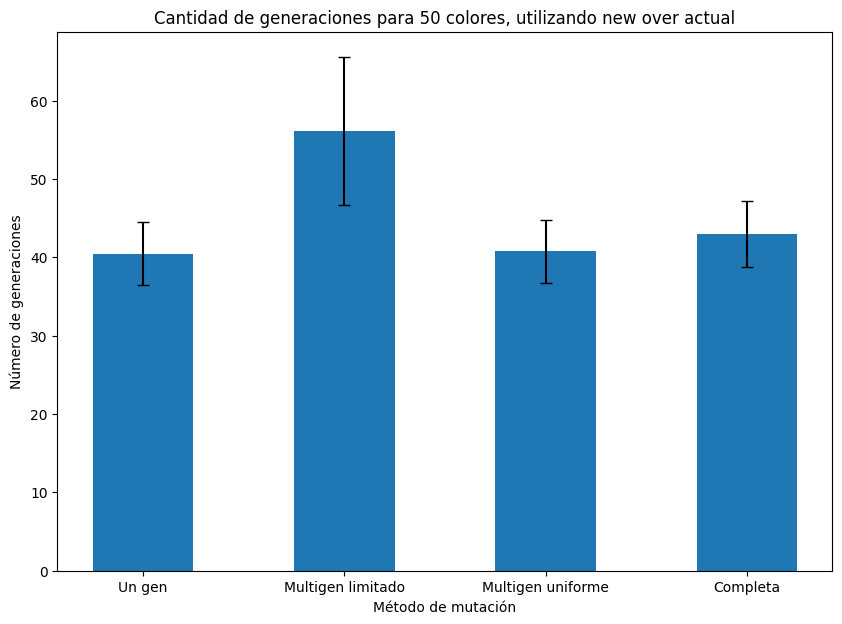

In [16]:
current_selection = "TOURNAMENT_PROBABILISTIC"
current_crossing = "UNIFORM"
current_p_mutation = 0.5
current_combination = "USE_ALL"

average_time = [] 
average_generations = [] 
  
std_errors_time = []
std_errors_generations = []
name = 0

mutation_options_name = ["Un gen", "Multigen limitado", "Multigen uniforme", "Completa"]
for option in mutation_options:
    print(option)
    times = []
    generations = []
    best_of_each_generation_array = []
    for i in range(color_count):
        time_passed, finish_condition, best_subject, best_of_each_generation, generation = genetic_algorithm(palette, N, target_colors[i], current_selection,
                        current_crossing, option, current_p_mutation,
                        current_combination, K, max_generations, d_error, time, start_population[i])

        times.append(time_passed)
        generations.append(generation)
        if (i < color_graph):
            best_of_each_generation_array.append(best_of_each_generation)
        
    plot_evolution(best_of_each_generation_array, f'mutación {mutation_options_name[name]}' )
    name+=1
    
    avg_time = sum(times) / len(times)        
    average_time.append(avg_time)
    error_time = np.std(times) / np.sqrt(len(times))
    std_errors_time.append(error_time)

    avg_step = sum(generations) / len(generations)        
    average_generations.append(avg_step)
    error_step = np.std(generations) / np.sqrt(len(generations))
    std_errors_generations.append(error_step)

#----------------------------------------
#Grafico del tiempo que tarda
fig = plt.figure(figsize =(10, 7))
plt.bar(mutation_options_name, average_time, yerr=std_errors_time, capsize=4, width=0.5, align="center")
plt.title(f'Tiempo promedio de resolución para {color_count} colores, utilizando use all')
plt.xlabel('Método de mutación')
plt.ylabel('Tiempo promedio de resolución (seg)')

plt.show()

#----------------------------------------
#Grafico de cantidad de pasos
fig = plt.figure(figsize =(10, 7))
plt.bar(mutation_options_name, average_generations, yerr=std_errors_generations, capsize=4, width=0.5, align="center")
plt.title(f'Cantidad de generaciones para {color_count} colores, utilizando use all')
plt.xlabel('Método de mutación')
plt.ylabel('Número de generaciones')
plt.show()

current_selection = "TOURNAMENT_PROBABILISTIC"
current_crossing = "UNIFORM"
current_p_mutation = 0.5
current_combination = "NEW_OVER_ACTUAL"

average_time = [] 
average_generations = [] 
  
std_errors_time = []
std_errors_generations = []
name = 0

mutation_options_name = ["Un gen", "Multigen limitado", "Multigen uniforme", "Completa"]
for option in mutation_options:
    print(option)
    times = []
    generations = []
    best_of_each_generation_array = []
    for i in range(color_count):
        time_passed, finish_condition, best_subject, best_of_each_generation, generation = genetic_algorithm(palette, N, target_colors[i], current_selection,
                        current_crossing, option, current_p_mutation,
                        current_combination, K, max_generations, d_error, time, start_population[i])

        times.append(time_passed)
        generations.append(generation)
        if (i < color_graph):
            best_of_each_generation_array.append(best_of_each_generation)
        
    plot_evolution(best_of_each_generation_array, f'mutación {mutation_options_name[name]}' )
    name+=1
    
    avg_time = sum(times) / len(times)        
    average_time.append(avg_time)
    error_time = np.std(times) / np.sqrt(len(times))
    std_errors_time.append(error_time)

    avg_step = sum(generations) / len(generations)        
    average_generations.append(avg_step)
    error_step = np.std(generations) / np.sqrt(len(generations))
    std_errors_generations.append(error_step)

#----------------------------------------
#Grafico del tiempo que tarda
fig = plt.figure(figsize =(10, 7))
plt.bar(mutation_options_name, average_time, yerr=std_errors_time, capsize=4, width=0.5, align="center")
plt.title(f'Tiempo promedio de resolución para {color_count} colores, utilizando new over actual')
plt.xlabel('Método de mutación')
plt.ylabel('Tiempo promedio de resolución (seg)')

plt.show()

#----------------------------------------
#Grafico de cantidad de pasos
fig = plt.figure(figsize =(10, 7))
plt.bar(mutation_options_name, average_generations, yerr=std_errors_generations, capsize=4, width=0.5, align="center")
plt.title(f'Cantidad de generaciones para {color_count} colores, utilizando new over actual')
plt.xlabel('Método de mutación')
plt.ylabel('Número de generaciones')
plt.show()

Run variando porcentaje de mutación

0.2


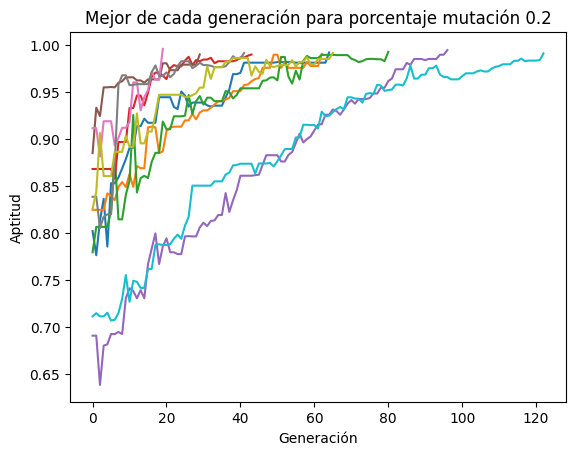

0.4


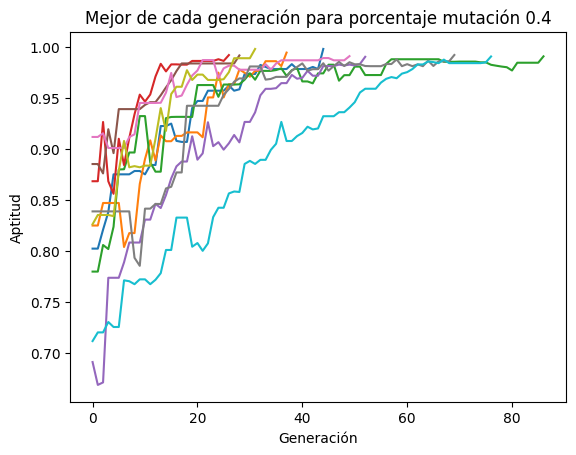

0.6


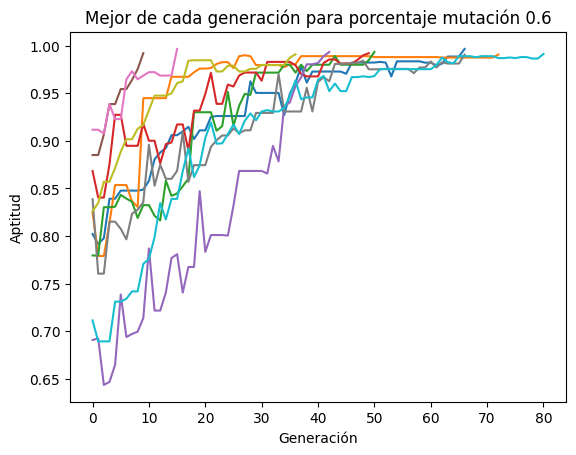

0.8


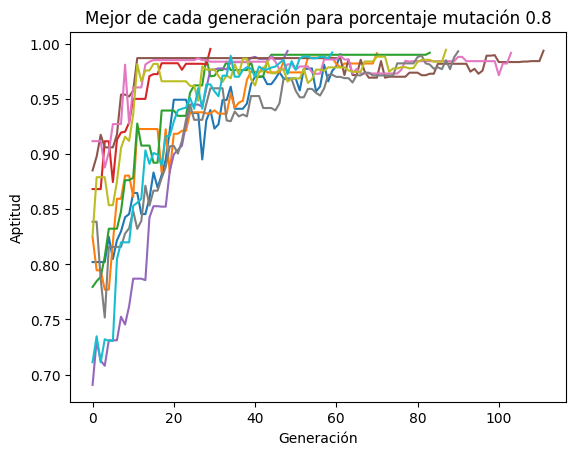

1


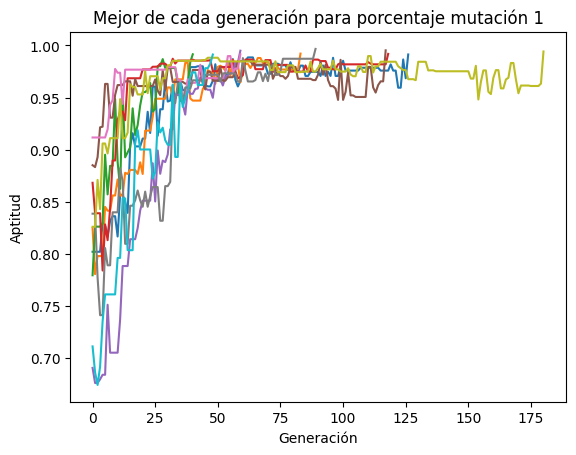

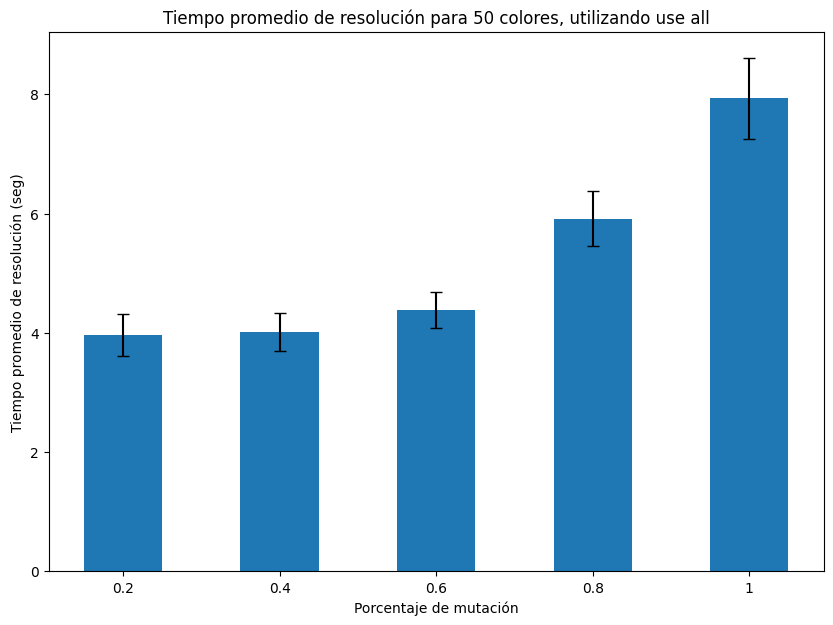

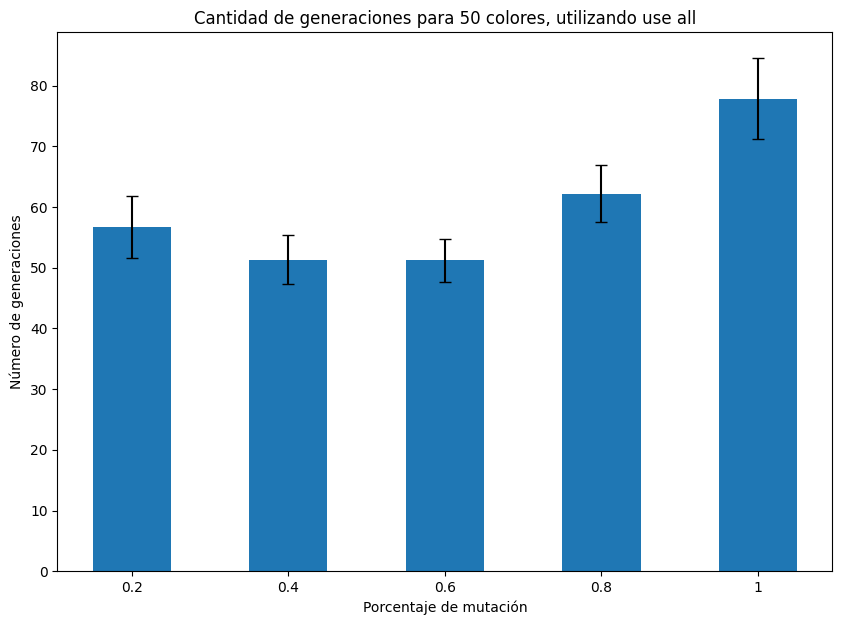

0.2


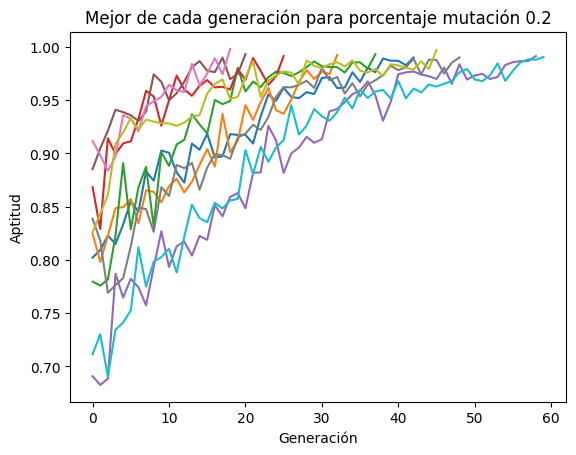

0.4


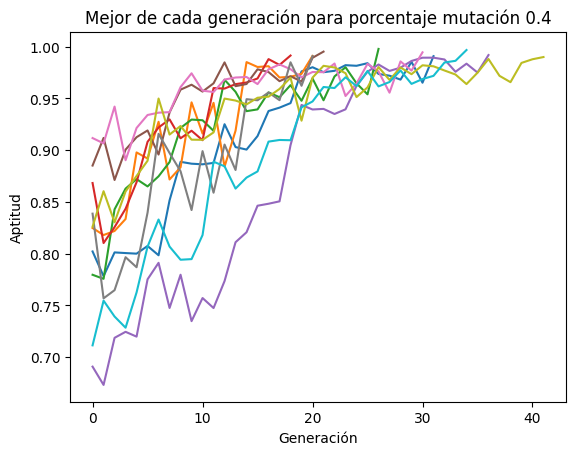

0.6


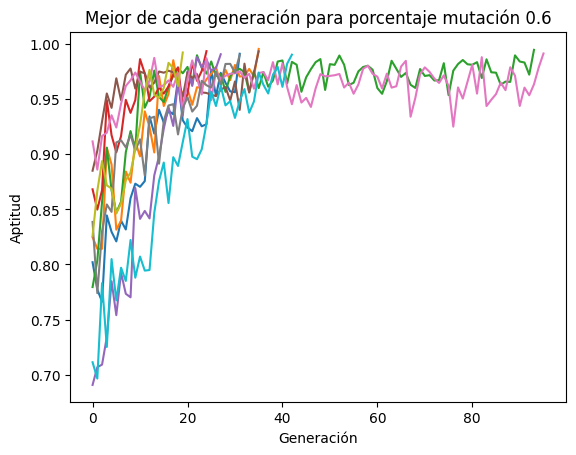

0.8


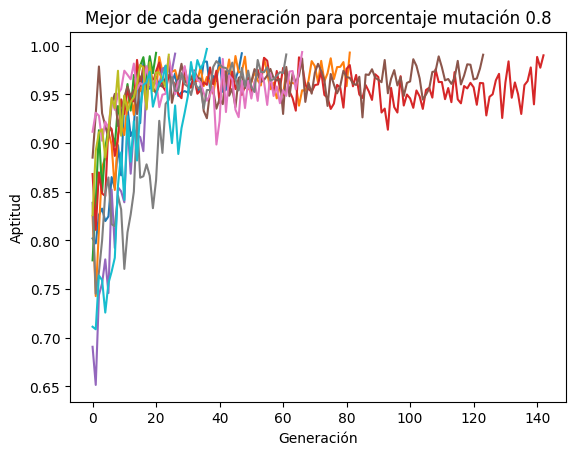

1


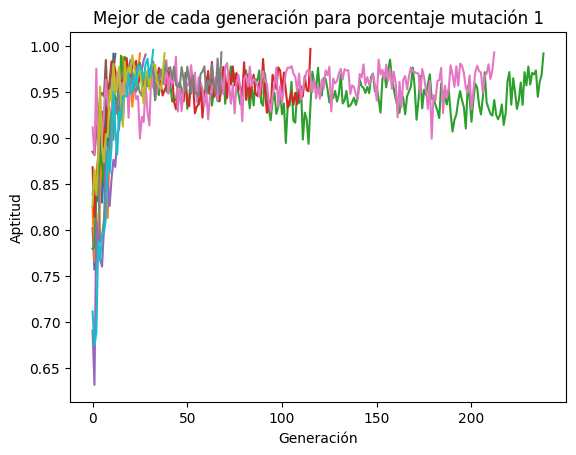

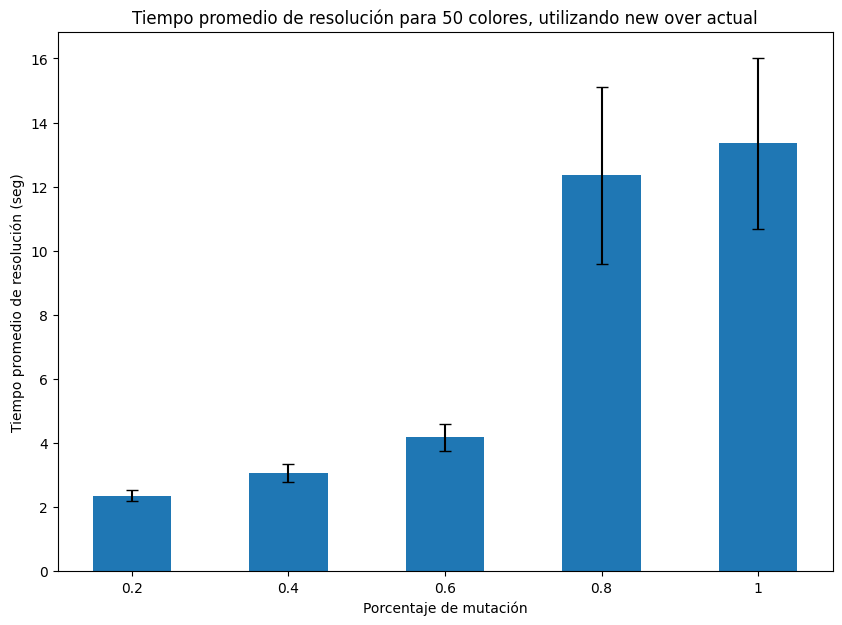

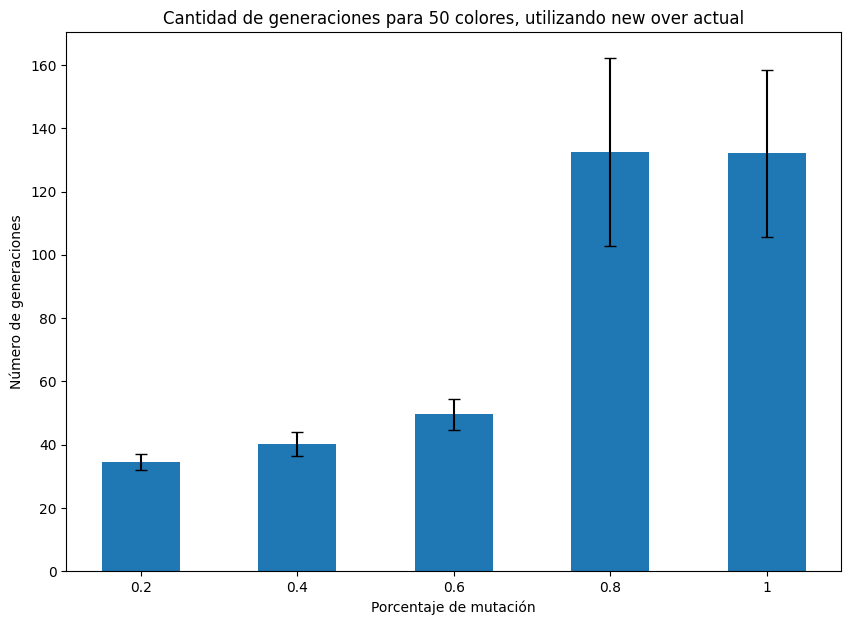

In [17]:
current_selection = "TOURNAMENT_PROBABILISTIC"
current_crossing = "UNIFORM"
current_mutation = "COMPLETE"
current_combination = "USE_ALL"

average_time = [] 
average_generations = [] 
  
std_errors_time = []
std_errors_generations = []
name = 0

p_mutation_options = [0.2, 0.4, 0.6, 0.8, 1]
p_mutation_options_name = ["0.2", "0.4", "0.6", "0.8", "1"]
for option in p_mutation_options:
    print(option)
    times = []
    generations = []
    best_of_each_generation_array = []
    for i in range(color_count):
        time_passed, finish_condition, best_subject, best_of_each_generation, generation = genetic_algorithm(palette, N, target_colors[i], current_selection,
                        current_crossing, current_mutation, option,
                        current_combination, K, max_generations, d_error, time, start_population[i])

        times.append(time_passed)
        generations.append(generation)
        if (i < color_graph):
            best_of_each_generation_array.append(best_of_each_generation)
        
    plot_evolution(best_of_each_generation_array, f'porcentaje mutación {p_mutation_options[name]}' )
    name+=1
    
    avg_time = sum(times) / len(times)        
    average_time.append(avg_time)
    error_time = np.std(times) / np.sqrt(len(times))
    std_errors_time.append(error_time)

    avg_step = sum(generations) / len(generations)        
    average_generations.append(avg_step)
    error_step = np.std(generations) / np.sqrt(len(generations))
    std_errors_generations.append(error_step)

#----------------------------------------
#Grafico del tiempo que tarda
fig = plt.figure(figsize =(10, 7))
plt.bar(p_mutation_options_name, average_time, yerr=std_errors_time, capsize=4, width=0.5, align="center")
plt.title(f'Tiempo promedio de resolución para {color_count} colores, utilizando use all')
plt.xlabel('Porcentaje de mutación')
plt.ylabel('Tiempo promedio de resolución (seg)')

plt.show()

#----------------------------------------
#Grafico de cantidad de pasos
fig = plt.figure(figsize =(10, 7))
plt.bar(p_mutation_options_name, average_generations, yerr=std_errors_generations, capsize=4, width=0.5, align="center")
plt.title(f'Cantidad de generaciones para {color_count} colores, utilizando use all')
plt.xlabel('Porcentaje de mutación')
plt.ylabel('Número de generaciones')
plt.show()

current_selection = "TOURNAMENT_PROBABILISTIC"
current_crossing = "UNIFORM"
current_mutation = "COMPLETE"
current_combination = "NEW_OVER_ACTUAL"

average_time = [] 
average_generations = [] 
  
std_errors_time = []
std_errors_generations = []
name = 0

p_mutation_options = [0.2, 0.4, 0.6, 0.8, 1]
p_mutation_options_name = ["0.2", "0.4", "0.6", "0.8", "1"]
for option in p_mutation_options:
    print(option)
    times = []
    generations = []
    best_of_each_generation_array = []
    for i in range(color_count):
        time_passed, finish_condition, best_subject, best_of_each_generation, generation = genetic_algorithm(palette, N, target_colors[i], current_selection,
                        current_crossing, current_mutation, option,
                        current_combination, K, max_generations, d_error, time, start_population[i])

        times.append(time_passed)
        generations.append(generation)
        if (i < color_graph):
            best_of_each_generation_array.append(best_of_each_generation)
        
    plot_evolution(best_of_each_generation_array, f'porcentaje mutación {p_mutation_options[name]}' )
    name+=1
    
    avg_time = sum(times) / len(times)        
    average_time.append(avg_time)
    error_time = np.std(times) / np.sqrt(len(times))
    std_errors_time.append(error_time)

    avg_step = sum(generations) / len(generations)        
    average_generations.append(avg_step)
    error_step = np.std(generations) / np.sqrt(len(generations))
    std_errors_generations.append(error_step)

#----------------------------------------
#Grafico del tiempo que tarda
fig = plt.figure(figsize =(10, 7))
plt.bar(p_mutation_options_name, average_time, yerr=std_errors_time, capsize=4, width=0.5, align="center")
plt.title(f'Tiempo promedio de resolución para {color_count} colores, utilizando new over actual')
plt.xlabel('Porcentaje de mutación')
plt.ylabel('Tiempo promedio de resolución (seg)')

plt.show()

#----------------------------------------
#Grafico de cantidad de pasos
fig = plt.figure(figsize =(10, 7))
plt.bar(p_mutation_options_name, average_generations, yerr=std_errors_generations, capsize=4, width=0.5, align="center")
plt.title(f'Cantidad de generaciones para {color_count} colores, utilizando new over actual')
plt.xlabel('Porcentaje de mutación')
plt.ylabel('Número de generaciones')
plt.show()